In [1]:
import requests
from transformers import pipeline

pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large", device="cuda")

c:\Users\seth2\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from PIL import Image
import io
import base64
kwords = pipeline("text2text-generation", model="google/flan-t5-large", device="cpu")


In [3]:
def turn(prompt):
    response = requests.post("http://192.168.1.231:7860/sdapi/v1/txt2img", json={"prompt": prompt, "steps": 1, "cfg_scale": 1})
    img = Image.open(io.BytesIO(base64.b64decode(response.json()['images'][0])))
    return (img, pipe(img)[0]['generated_text'])
def gen(prompt):
    response = requests.post("http://192.168.1.231:7860/sdapi/v1/txt2img", json={"prompt": prompt, "steps": 1, "cfg_scale": 1})
    img = Image.open(io.BytesIO(base64.b64decode(response.json()['images'][0])))
    return img


def fail(success):
    words = kwords("Write keywords to go with the following sentence. " + success)[0]['generated_text']
    uncompiled = []
    for w in words.split(" "):
        uncompiled.append(w)
        uncompiled.append(kwords("Q: what is similar to " + w)[0]['generated_text'])
    uc =""
    for w in uncompiled:
        uc = uc + w + " "
    uc.removesuffix(" ")

    return kwords("Form a scene using these keywords: " + uc)[0]['generated_text']

In [4]:
from IPython.display import clear_output

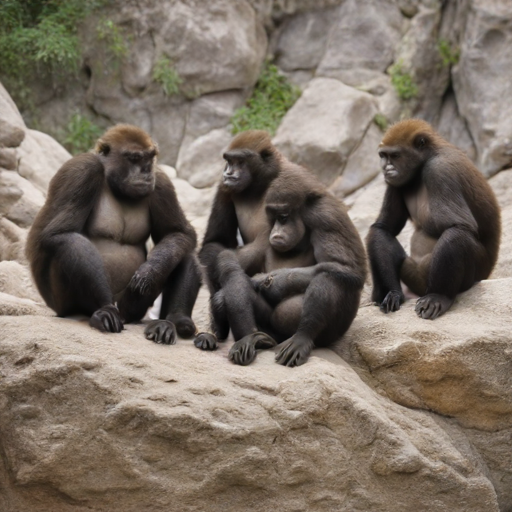

OH! I think I see "a zebra sitting in an enclosure of igneous rocks"


In [59]:
prompt = "Dog laying under a christmas tree"

for i in range(3):
    img = gen(prompt)

    clear_output()
    display(img)
    
    prompt = pipe(img)[0]['generated_text']
    prompt = fail(prompt)
    print("OH! I think I see \"" + prompt + "\"")


[{'generated_text': 'A man is driving a car back to the backbone.'}]

c:\Users\seth2\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\generation\utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'A man is driving a car back to the backbone.'}]